# Deep Learning
# DL05-Validacion Dropout Pytorch



## <font color='blue'>**Overfitting y Dropout**</font>

Ahora que se tiene una red entrenada, se puede usar para hacer predicciones. Esto generalmente se llama **inferencia**. Sin embargo, las redes neuronales tienden a funcionar *demasiado bien* en los datos de entrenamiento y no pueden generalizarse a datos que no se han visto antes. Esto se llama **sobreajuste (Overfitting)** y perjudica el rendimiento de la inferencia. Para probar si una red esta sobreajustada durante el entrenamiento, medimos el rendimiento en datos que no están en el conjunto de entrenamiento llamado conjunto de **validación**. Evitamos el sobreajuste a través de la regularización, como el dropout, mientras supervisamos el rendimiento de validación durante el entrenamiento.
 Esta vez aprovecharemos el conjunto de pruebas que puede obtener configurando `train = False` aquí:


```python
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
```
El conjunto de prueba contiene imágenes al igual que el conjunto de entrenamiento. Por lo general, verá el 10-20% del conjunto de datos original para pruebas y validación, y el resto se utilizará para la entrenamiento.

![Backpropagation](https://drive.google.com/uc?export=view&id=1Sf6I7h4gP0EJySDEYt04AfPcBh2zRbmK)

### Características Generales

Vamos a trabajar el concepto de dropout con Fashion-MNIST.
Al igual que su laureado y reconocido predecesor, Fashion-MNIST se compone de imágenes en escala de grises, de 28×28 pixeles.

60.000 imágenes componen Fashion-MNIST, donde 50.000 de ellas son para entrenamiento, y las restantes 10.000 para pruebas. Todas las categorías (10) poseen 6.000 imágenes, lo que implica que el dataset está balanceado.

A diferencia del MNIST tradicional, las categorías no son números del 0 al 9 escritos a mano alzada, sino prendas de vestir, como se puede suponer por su nombre. En particular, estas son las categorías:

1. T-shirt/top (Camiseta o top).
2. Trouser/pants (Pantalones).
3. Pullover shirt (Pullover).
4. Dress (Vestido).
5. Coat (Abrigo).
6. Sandal (Sandalias).
7. Shirt (Camisa).
8. Sneaker (Zapatos deportivos).
9. Bag (Bolso o maleta)
10. Ankle boot (Botines).

### Generemos los conjuntos de entrenamiento y validación.

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import random_split
import numpy as np

# Se define una normalizacion y trasnformacion de la data.
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Cargamos los datos que utilizaremos para entrenar.
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)

# Esto lo hacemos para que el entrenamiento sea mas rapido, bajamos el conjunto.
trainset_sample, trainset_val = random_split(trainset, (10000,50000))
trainloader = torch.utils.data.DataLoader(trainset_sample, batch_size=64, shuffle=True)
# Los tamaños de los batch deben ser iguales porque los tensores deben ser iguales
trainval = torch.utils.data.DataLoader(trainset_val, batch_size=64, shuffle=True)

# Cargamos los datos que utilizamos para validar.
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|██████████| 26421880/26421880 [00:02<00:00, 11181147.64it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 177757.41it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3302675.99it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18314060.21it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



tensor(1)


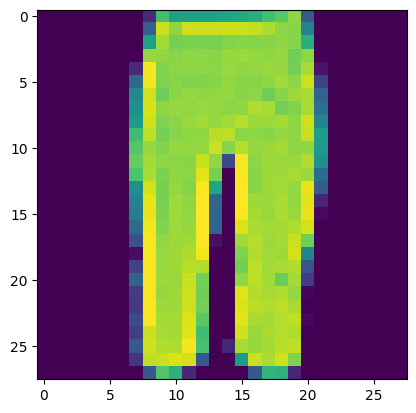

In [ ]:
# Miremos el dataset
import matplotlib.pyplot as plt

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[10]
print(labels[10])
img.view(1, 28, 28)
plt.imshow(img.resize_(1, 28, 28).numpy().squeeze())


### Construyendo y evaluando la red.

El objetivo de la validación es medir el rendimiento del modelo en datos que no forman parte del conjunto de entrenamiento.  Por lo general, esto es solo medir la precisión, el porcentaje de clases que la red predijo correctamente. Otras opciones son [__precisión y recuperación__](https://en.wikipedia.org/wiki/Precision_and_recall#Definition_ (class_context)) y la tasa de error de top 5 (__top-k__ nos indica como métrica que el valor correcto está dentro de las __k__ primeras opciones predichas). La  métrica a utilizar va a depender del problema que se está resolviendo. En esta oportunidad, nos centraremos en la precisión.

```
class Classifier(nn.Module):
  def __init__(self):


  def forward(self, x):
  
  
  return x


model = Classifier()

images, labels = next(iter(testloader))
# Obtenga las probabilidades de las clases
ps = torch.exp(model(images))
# Se deberia obtener 10 clases 64 ejemplos.
print(ps.shape)
----------------------------------------------------
torch.Size([64, 10])
```



Con las probabilidades, podemos obtener la clase más probable utilizando el método `ps.topk`. Esto devuelve los valores más altos de $ k $. Como solo queremos la clase más probable, podemos usar `ps.topk (1)`. Esto devuelve una tupla de los valores superiores- $ k $ y los índices superiores- $ k $. Si el valor más alto es el quinto elemento, obtendremos 4 como índice.



```
top_p, top_class = ps.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])
```



Ahora podemos verificar si las clases predichas coinciden con las etiquetas. Esto es simple de hacer al igualar `top_class` y` labels`, pero debemos tener cuidado con las formas. Aquí `top_class` es un tensor 2D con forma` (64, 1) `mientras que` labels` es 1D con forma `(64)`. Para que la igualdad funcione de la manera que queremos, `top_class` y` labels` deben tener la misma forma.

Si hacemos

```
equals = top_class == labels.view(*top_class.shape)
```

`equals` tendrá forma` (64, 64) `. Lo que está haciendo es comparar un elemento en cada fila de `top_class` con cada elemento en` labels` que devuelve 64 valores booleanos Verdadero / Falso para cada fila.

Ahora necesitamos calcular el porcentaje de predicciones correctas. `equals` tiene valores binarios, ya sea 0 o 1. Esto significa que si solo sumamos todos los valores y dividimos por el número de valores, obtenemos el porcentaje de predicciones correctas. Esta es la misma operación que tomar la media, por lo que podemos obtener la precisión con una llamada a `torch.mean`.

```
RuntimeError: mean is not implemented for type torch.ByteTensor
```
Esto sucede porque `equals` tiene el tipo` torch.ByteTensor` pero `torch.mean` no está implementado para tensores con ese tipo. Por lo tanto, necesitaremos convertir `igual` a un tensor flotante. Tenga en cuenta que cuando tomamos `torch.mean`, devuelve un tensor escalar, para obtener el valor real como flotante necesitaremos hacer` precision.item () `.



```
equals = top_class == labels.view(*top_class.shape)
accuracy = torch.mean(equals.type(torch.FloatTensor)) # Conversion de tipo de datos.
print(f'Accuracy: {accuracy.item()*100}%')
```




La red no está entrenada, por lo que está haciendo conjeturas aleatorias y deberíamos ver una precisión de alrededor del 10%. Ahora entrenemos nuestra red e incluyamos nuestro conjunto de test para que podamos medir qué tan bien está funcionando la red. Como no estamos actualizando nuestros parámetros(gradientes) en el momento  de validar, podemos acelerar el proceso apagando los degradados usando `torch.no_grad ()`:


```python
# turn off gradients
with torch.no_grad():
    # validation pass here
    for images, labels in testloader:
        ...
```


## <font color='green'>**Actividad 1**</font>

En esta actividad vamos a entrenar un modelo para clasificar digitos pero adicionalmente incorporaremos el conjunto de validación.

1. Realice el entrenamiento de la red pero incorpore el conjunto de validación.

2. Recuerde apagar los gradientes en la validación.

Analice y utilice el siguiente código para trabajar con el conjunto de validación.

```python
        test_loss = 0
        accuracy = 0
        
        # Apagamos los gradientes para la validación. Permite ahorrar memoria y computo.
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                # Aquí medimos el error en el conjunto de entrenamiento.
                test_loss += criterion(log_ps, labels)
                # Como es logaritmo de la probabilidad, debemos aplicar la exponencial.
                ps = torch.exp(log_ps)
                # La clase top 1.
                top_p, top_class = ps.topk(1, dim=1)
                # equals toma valores True or False.
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
```
3. Imprima el Trainig Loss, Test loss y Test Accuracy.
4. Genere las gráficas.

Para que no sea tan lento ponga como máximo 5 epochs.



In [ ]:
# Aqui el codigo

Conclusiones:
La curva de entrenamiento nos muestra una reducción casi monotónica del error. Sin embargo, cuando aplicamos el modelo en el set de pruebas, vemos que, despues de una bajada, se observa una pendiente de subida en el __validation loss__. Deberemos encontrar cual es el conjunto de parámetros que entregó ese valor míniomo del error.

<font color='green'>**Fin Actividad 1**</font>

### Overfitting

Si observamos los errores  de entrenamiento y validación a medida que entrenamos la red, podemos ver un fenómeno conocido como sobreajuste.


![OverFitting](https://drive.google.com/uc?export=view&id=1q2B9ov7gq0-Ae1-_2QWqBMJ1FP8tmBYM)


La red aprende el conjunto de entrenamiento cada vez mejor, lo que resulta en menores errores de entrenamiento. Sin embargo, comienza a tener problemas para generalizar los datos fuera del conjunto de entrenamiento, lo que lleva a que aumente el error de validación. El objetivo final de cualquier modelo de aprendizaje profundo es hacer predicciones sobre nuevos datos, por lo que debemos esforzarnos por obtener el menor error de validación posible. Una opción es usar la versión del modelo con la pérdida de validación más baja, aquí la de alrededor de 8-10 épocs de entrenamiento. Esta estrategia se llama *parada anticipada*. En la práctica, guardaría el modelo con frecuencia mientras entrena y luego elegiría el modelo con la menor pérdida de validación.

El método más común para reducir el sobreajuste (fuera de la detención anticipada) es *dropout*, donde abandonamos aleatoriamente las unidades de entrada. Esto obliga a la red a compartir información entre pesos, lo que aumenta su capacidad de generalizar a nuevos datos. Agregar abandono en PyTorch es sencillo usando el módulo [`nn.Dropout`] (https://pytorch.org/docs/stable/nn.html#torch.nn.Dropout).


```python
        x = self.dropout(F.relu(self.fc3(x)))
        return x
```
Durante el entrenamiento queremos usar el dropout para evitar el sobreajuste, pero durante la inferencia queremos usar toda la red. Por lo tanto, debemos desactivar el abandono durante la validación, las pruebas y cada vez que usemos la red para hacer predicciones. Para hacer esto, usa `model.eval ()`. Esto establece el modelo en modo de evaluación donde la probabilidad de abandono es 0. Puede volver a activar el abandono configurando el modelo en modo de entrenamiento con `model.train ()`. En general, el patrón para el bucle de validación se verá así, donde apaga los gradientes, establece el modelo en modo de evaluación, calcula la pérdida de validación y la métrica, luego establece el modelo nuevamente en modo de entrenamiento.

```python
# turn off gradients
with torch.no_grad():
    
    # set model to evaluation mode
    model.eval()
    
    # validation pass here
    for images, labels in testloader:
        ...

# set model back to train mode
model.train()
```

## <font color='green'>**Actividad 2**</font>

Implemente equivalente a la **Actividad 2**, pero utilizando dropout.

In [ ]:
# Aqui el codigo

Conclusiones:
- Podemos guardar los objetos del modelo y los valores de los errores para comparar iteración a iteración y determinar, después de muchas de ellas, cual fue el menor.
- Cuando usemos nuestro modelo ya entrenado, hay que ponerlo en modeo evaluación: `model.eval()`.
- Con los vectores de salida, el $y$ y el $\hat{y}$, podemos calcular todas las métrixcas típicas de una clasifiación (__presition, recall, F-1 Score__).


<font color='green'>**Fin Actividad 2**</font>

## Inferencia

Ahora que el modelo está entrenado, podemos usarlo para inferencia. Debemos configurar el modelo en modo de inferencia con `model.eval()`. También querrás desactivar autograd con `torch.no_grad()`.

Veamos como se realiza esto con Pytorch.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

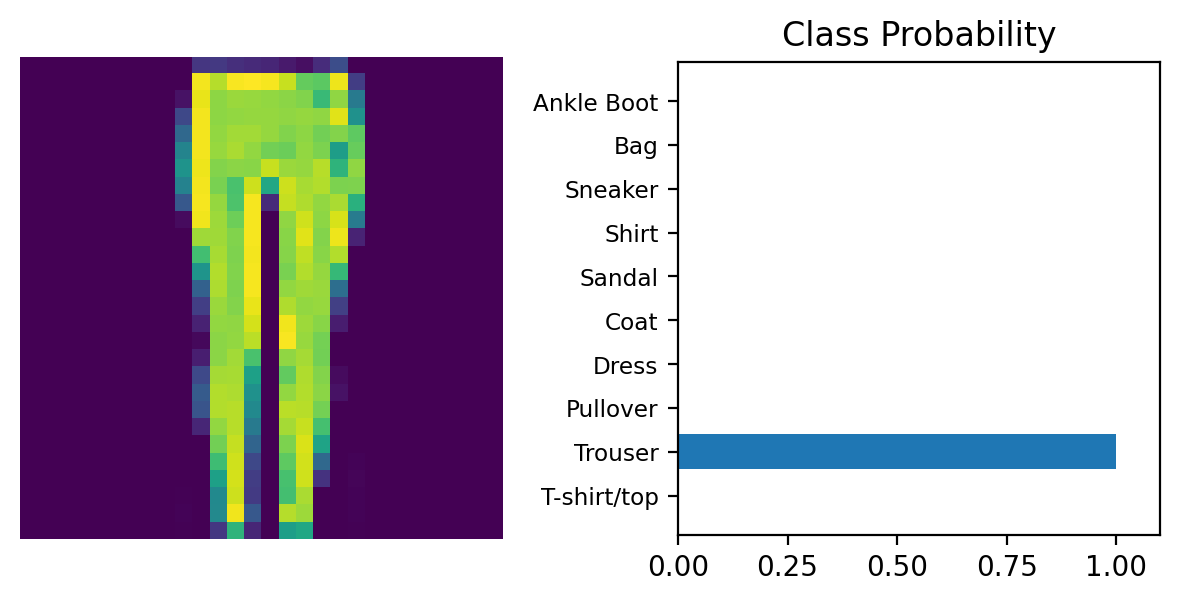

In [ ]:
# Probemos nuestra red.

model.eval()

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[10]
# Convirtiendo la imagen 2D a vector 1D.
img = img.view(1, 784)

# Calculando la probabilidad de las clases.
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Dibujando la imagen y las probabilidedes de las clases.
view_classify(img.view(1, 28, 28), ps, version='Fashion')

<img src="https://drive.google.com/uc?export=view&id=1DNuGbS1i-9it4Nyr3ZMncQz9cRhs2eJr" width="100" align="left" title="Runa-perth">
<br clear="left">

## <font color='green'>**Regularizaciones.**</font>

La regularización es una técnica en aprendizaje automático y estadísticas que se utiliza para prevenir el sobreajuste (overfitting) de un modelo a los datos de entrenamiento. El sobreajuste ocurre cuando un modelo se ajusta tan bien a los datos de entrenamiento que pierde su capacidad para generalizar a datos no vistos. La regularización actúa como una restricción en la capacidad del modelo para adaptarse completamente a los datos de entrenamiento, lo que permite que el modelo generalice mejor.

Hay varios métodos de regularización que se utilizan en aprendizaje automático. Algunos de los más comunes son:

Regularización L1 (Lasso): Agrega una penalización proporcional al valor absoluto de los parámetros del modelo. Esto puede resultar en que algunos parámetros se vuelvan exactamente cero, lo que efectivamente elimina algunas características del modelo.

Regularización L2 (Ridge): Agrega una penalización proporcional al cuadrado de los parámetros del modelo. Esto tiende a reducir los valores de los parámetros sin hacer que se vuelvan cero.

Regularización L1 y L2 combinadas (ElasticNet): Combina las penalizaciones de L1 y L2.

Dropout: Es una técnica de regularización específica para redes neuronales. Durante el entrenamiento, algunas neuronas se "desactivan" al azar con una cierta probabilidad, lo que significa que no se utilizan durante el paso de propagación hacia adelante. Esto evita que la red se vuelva demasiado dependiente de cualquier neurona individual y mejora la generalización.

En PyTorch, la regularización L1 y L2 se puede implementar especificando el argumento weight_decay al optimizador. El dropout se puede implementar utilizando la capa nn.Dropout.

Aquí hay un ejemplo de cómo implementar regularización L2 y dropout en PyTorch:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Definir la arquitectura de la red neuronal con dropout
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.5) # Probabilidad de 0.5 de desactivar una neurona

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Instanciar la red neuronal
model = Network()

# Definir la función de pérdida
criterion = nn.CrossEntropyLoss()

# Definir el optimizador con regularización L2 (weight decay)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)


En este ejemplo, hemos definido una red neuronal con una capa de dropout que desactivará al azar el 50% de las neuronas durante el entrenamiento. También hemos definido un optimizador con regularización L2 utilizando el argumento weight_decay.  

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Definir la arquitectura de la red neuronal
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instanciar la red neuronal
model = Network()

# Definir la función de pérdida
criterion = nn.CrossEntropyLoss()

# Definir el optimizador
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Definir la penalización L1
l1_lambda = 0.01

def l1_penalty(model):
    l1_norm = sum(torch.norm(param, 1) for param in model.parameters())
    return l1_lambda * l1_norm

# Durante el entrenamiento (Ejemplo)
# Suponiendo que tienes 'inputs' y 'labels' para tu lote de entrenamiento
# outputs = model(inputs)
# loss = criterion(outputs, labels)
# l1_loss = l1_penalty(model)
# total_loss = loss + l1_loss
# total_loss.backward()
# optimizer.step()




En este ejemplo, hemos añadido la penalización L1 a la función de pérdida utilizando el método torch.norm con el argumento 1 para calcular la norma L1 de los parámetros del modelo.

<img src="https://drive.google.com/uc?export=view&id=1Igtn9UXg6NGeRWsqh4hefQUjV0hmzlBv" width="100" align="left" title="Runa-perth">
<br clear="left">

## <font color='red'>**Otros métodos de regularización.**</font>

**Normalización de lote (Batch Normalization)**: Esta técnica normaliza las entradas de cada capa, pero lo hace diferente para cada mini-lote en el entrenamiento. La normalización se realiza sobre el conjunto de datos del mini-lote en lugar de todo el conjunto de datos. La idea es reducir el cambio en la distribución de las entradas durante el entrenamiento, lo que puede acelerar el proceso de entrenamiento y mejorar el rendimiento del modelo.

**Normalización de capa (Layer Normalization)**: A diferencia de la normalización de lote, la normalización de capa normaliza las entradas de la capa a través de las características en lugar de los ejemplos en el lote. La normalización se realiza para cada ejemplo en el mini-lote de manera independiente. Esto la hace menos sensible al tamaño del lote y puede ser útil en situaciones en las que el tamaño del lote varía.

**Normalización de instancia (Instance Normalization)**: Similar a la normalización de capa, pero se aplica principalmente en tareas de visión por computadora como la transferencia de estilo. Normaliza cada canal de una imagen de manera independiente.

**Normalización de grupo (Group Normalization)**: Divide los canales en grupos y normaliza los valores dentro de cada grupo. Se utiliza en tareas de visión por computadora y es útil en situaciones en las que el tamaño del lote es pequeño.

**Normalización de peso (Weight Normalization)**: En lugar de normalizar las entradas, la normalización de peso normaliza los pesos de la capa.

In [ ]:
import torch.nn as nn

class BatchNormModel(nn.Module):
    def __init__(self):
        super(BatchNormModel, self).__init__()
        self.fc1 = nn.Linear(10, 50)
        self.bn1 = nn.BatchNorm1d(50)
        self.fc2 = nn.Linear(50, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.fc2(x)
        return x


In [ ]:
import torch.nn as nn

class LayerNormModel(nn.Module):
    def __init__(self):
        super(LayerNormModel, self).__init__()
        self.fc1 = nn.Linear(10, 50)
        self.ln1 = nn.LayerNorm(50)
        self.fc2 = nn.Linear(50, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.ln1(x)
        x = self.fc2(x)
        return x


In [ ]:
import torch.nn as nn

class InstanceNormModel(nn.Module):
    def __init__(self):
        super(InstanceNormModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.in1 = nn.InstanceNorm2d(64)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=1, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.in1(x)
        x = self.conv2(x)
        return x


In [ ]:
import torch.nn as nn

class GroupNormModel(nn.Module):
    def __init__(self):
        super(GroupNormModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.gn1 = nn.GroupNorm(32, 64) # 32 groups, 64 channels
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=1, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.gn1(x)
        x = self.conv2(x)
        return x


In [ ]:
import torch.nn as nn
import torch.nn.utils as utils

class WeightNormModel(nn.Module):
    def __init__(self):
        super(WeightNormModel, self).__init__()
        self.fc1 = utils.weight_norm(nn.Linear(10, 50))
        self.fc2 = utils.weight_norm(nn.Linear(50, 1))

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x


## <font color='green'>**Actividad 3**</font>

**Clasificación de dígitos manuscritos con MNIST**

Objetivo: Mejorar la precisión de un modelo de red neuronal en un conjunto de datos de validación mediante la aplicación y ajuste de técnicas de regularización.

Instrucciones:

Carga el conjunto de datos MNIST.
Define una red neuronal simple.
Entrena el modelo sin regularización y evalúa su desempeño.
Modifica el modelo para incluir dropout y regularización L2.
Ajusta el tamaño del lote y observa el efecto en la convergencia y precisión del modelo.
Compara los resultados de ambos modelos.

Observa la precisión de ambos modelos en el conjunto de prueba. ¿El modelo con regularización tiene un mejor desempeño?

Modifica el valor del parámetro dropout_p en el modelo. ¿Cómo afecta al desempeño del modelo?

Cambia el valor de weight_decay (regularización L2). ¿Cuál es el impacto en la precisión?

Ajusta el batch_size en los DataLoaders. ¿Cómo afecta la velocidad de convergencia y la precisión?

In [ ]:
# Importa las bibliotecas necesarias
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

# 1. Carga el conjunto de datos MNIST
transform = transforms.ToTensor()

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 2. Define una red neuronal simple
class SimpleNN(nn.Module):
    def __init__(self, dropout_p=0.0):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 10)
        self.dropout = nn.Dropout(p=dropout_p)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Función de entrenamiento
def train(model, train_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        for inputs, labels in train_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

# Función de evaluación
def evaluate(model, test_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy:.2f}%')

# 3. Entrena el modelo sin regularización
model1 = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)
train(model1, train_loader, criterion, optimizer, epochs=5)
evaluate(model1, test_loader)

# 4. Modifica el modelo para incluir dropout y regularización L2
model2 = SimpleNN(dropout_p=0.5)
optimizer = optim.Adam(model2.parameters(), lr=0.001, weight_decay=0.01) # Regularización L2 con weight_decay
train(model2, train_loader, criterion, optimizer, epochs=5)
evaluate(model2, test_loader)

100%|██████████| 9912422/9912422 [00:00<00:00, 431520558.44it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 10254439.50it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 133241333.14it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22706232.14it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Accuracy: 98.04%
Accuracy: 90.89%
